In [3]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from scipy import interpolate


In [2]:
class NaturalCubicSpline:
    def __init__(self,X,y):
        self.X=np.array(X)
        self.y= np.array(y)
        self.n = y.shape[0]-1
        self.__find_coefficients()
        
    def __zero_der(self,x):
        # creating a vector which correspons to interpolation criteria
        return np.array([ pow(x,i) for i in range(4)])[::-1]
    
    def __first_der_continuity(self,x):
        # creating a vector which corresponds to first derivative continuity condtion
        return np.array([3*pow(x,2),2*x,1,0,-3*pow(x,2),-2*x,-1,0])
    
    def __second_der_continuity(self,x):
        # creating a vector which corresponds to second derivative continuity condtion
        return np.array([6*x,2,0,0,-6*x,-2,0,0])
        
    def __cubic_spline_calc(self,x,coef):
        # calculates the value of the cubic polynomial with the given coefficients
        return np.dot(coef,np.array([pow(x,i) for i in range(3,-1,-1)]))
        
    
    def __find_coefficients(self):
        coeff_matrix = np.zeros((4*self.n,4*self.n))
        #initializing interpolating criterias (s(x_i)=y_i)
        for i in range(self.n+1):
            row = 2*i-1
            if i==0:
                coeff_matrix[row+1][4*(i):4*(i+1)] = self.__zero_der(self.X[i])
            elif i==self.n:
        
                coeff_matrix[row][4*(i-1):4*(i)] = self.__zero_der(self.X[i])
            else:
                coeff_matrix[row][4*(i-1):4*(i)] = self.__zero_der(self.X[i])
                coeff_matrix[row+1][4*(i):4*(i+1)] = self.__zero_der(self.X[i])
        
        # first derivative continuity criteria
        for i in range(1,self.n):
            row = 2*self.n+i-1
            coeff_matrix[row][4*i-4:4*i+4] = self.__first_der_continuity(self.X[i])
        #second derivative continuity criteria
        for i in range(1,self.n):
            row = 3*self.n+i-2
            coeff_matrix[row][4*i-4:4*i+4] = self.__second_der_continuity(self.X[i])
        
        # boundary conditions
        coeff_matrix[4*self.n-2][:8] = self.__second_der_continuity(self.X[0])
        coeff_matrix[4*self.n-1][-8:] =self.__second_der_continuity(self.X[-1])
        
        y= np.zeros(4*self.n)
        # creating output vector
        for i in range(self.n+1):
            if i!=0 and i!=self.n:
                y[2*i-1]=self.y[i]
                y[2*i]=self.y[i]
            elif i==0:
                y[i] = self.y[i]
            else:
                y[2*i-1]=self.y[i]
        # solving system of linear equations        
        self.coefficients = solve(coeff_matrix,y)
        
    
    def evaluate(self,x):
        spn_idx = np.nonzero(self.X<=x)[0][-1] # finding the interval to which x belongs(which spline)
        coef = self.coefficients[4*spn_idx:4*(spn_idx+1)] # calculating the value of natural cubic spline 
                                                          # at the given x
        return self.__cubic_spline_calc(x,coef)
    
    def plot_splin(self,X):
        # plotting function
        y = [ self.evaluate(i)  for i in X]   # use interpolation function returned by `interp1d`
        plt.plot(self.X, self.y, 'o', X, y, '-')
        plt.show()
        
    
    
    
        
        
            
        
    
            
        
            
            
                    
                    
            
            
        
        
    

In [4]:
>>> x = np.arange(0, 10)
>>> y = np.exp(-x/3.0)
>>> f = interpolate.interp1d(x, y,kind='cubic')

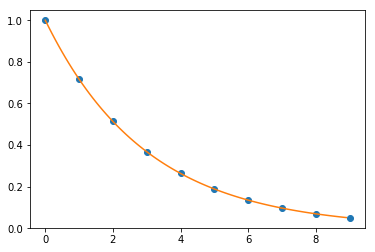

In [5]:
xnew = np.arange(0, 9, 0.1)
>>> ynew = f(xnew)   # use interpolation function returned by `interp1d`
>>> plt.plot(x, y, 'o', xnew, ynew, '-')
>>> plt.show()

In [6]:
cubic_spline_obj = NaturalCubicSpline(x,y)

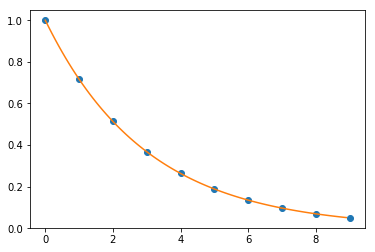

In [7]:
cubic_spline_obj.plot_splin(xnew) ## Our spline

In [8]:
y_val = np.array([ cubic_spline_obj.evaluate(i) for i in xnew])
print 'The absolute error between our spline and scipy spline is:' , np.sum(np.abs(y_val-ynew))

The absolute error between our spline and scipy spline is: 1.43288159116e-14
